<a href="https://colab.research.google.com/github/alouvre/CapstoneNeeds/blob/main/Data_Collecting_FiturPrediksiPolaPengeluaranUser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ambil data dari Kaggle : Bank Customer Segmentation (1M+ Transactions) https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/data

In [1]:
# Set Kaggle

# Menginstall kaggle
!pip install -q kaggle
# Membuat direktori
!mkdir ~/.kaggle
# Menyalin kaggle.json ke dir kaggle
!cp kaggle.json ~/.kaggle/
# Meminta izin untuk akses
!chmod 600 ~/.kaggle/kaggle.json

!kaggle -h

mkdir: cannot create directory ‘/root/.kaggle’: File exists
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        kernels {list, init, push, pull, output, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    files (f)           Commands related files
    config              Configuration settings


In [2]:
# import zipfile

# # Mengunduh dataset
# !kaggle datasets download -d 'shivamb/bank-customer-segmentation'

# # Membuat direktori dataset
# # !mkdir dataset

# # Mengekstraksi file zip
# nama_file_zip = 'bank-customer-segmentation.zip'
# nama_folder_tujuan = 'dataset'
# dataset_zip = zipfile.ZipFile(nama_file_zip,'r')
# dataset_zip.extractall('dataset')
# dataset_zip.close()

# # Memindahkan files ke direktori dataset
# !mv bank-customer-segmentation.zip dataset

In [3]:
import pandas as pd

# Memuat dataset dari direktori dataset
df = pd.read_csv('dataset/bank_transactions.csv')

# To stretch head function output to the notebook width
pd.set_option('display.max_columns', None)

# Menampilkan data mentah
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
# Menampilkan jumlah keseluruhan data mentah
df.shape

(1048567, 9)

In [5]:
# Memilih kolom-kolom yang relevan untuk digunakan
data = df[['CustomerID','CustAccountBalance', 'TransactionDate', 'TransactionID', 'TransactionAmount (INR)']]

data.head()

,CustomerID,CustAccountBalance,TransactionDate,TransactionID,TransactionAmount (INR)
0,C5841053,17819.05,2/8/16,T1,25.0
1,C2142763,2270.69,2/8/16,T2,27999.0
2,C4417068,17874.44,2/8/16,T3,459.0
3,C5342380,866503.21,2/8/16,T4,2060.0
4,C9031234,6714.43,2/8/16,T5,1762.5


In [6]:
# Mengganti nama beberapa kolom
data = data.rename(columns={'CustomerID': 'IDUser', 'CustAccountBalance': 'SaldoUser', 'TransactionAmount (INR)': 'TransactionAmount(IDR)'})

data.head()

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR)
0,C5841053,17819.05,2/8/16,T1,25.0
1,C2142763,2270.69,2/8/16,T2,27999.0
2,C4417068,17874.44,2/8/16,T3,459.0
3,C5342380,866503.21,2/8/16,T4,2060.0
4,C9031234,6714.43,2/8/16,T5,1762.5


In [7]:
# Untuk menampilkan informasi mengenai dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   IDUser                  1048567 non-null  object 
 1   SaldoUser               1046198 non-null  float64
 2   TransactionDate         1048567 non-null  object 
 3   TransactionID           1048567 non-null  object 
 4   TransactionAmount(IDR)  1048567 non-null  float64
dtypes: float64(2), object(3)
memory usage: 40.0+ MB


In [8]:
# Definisikan kurs pertukaran (contoh: 1 INR = 188,42 IDR)
inr_to_idr_exchange_rate = 188.42

# Buat kolom baru untuk jumlah transaksi dalam IDR
data['TransactionAmount(IDR)'] = data['TransactionAmount(IDR)'].astype(float)
data['TransactionAmount(IDR)'] = data['TransactionAmount(IDR)'] * inr_to_idr_exchange_rate

# Buat kolom baru untuk saldo pengguna dalam IDR
data['SaldoUser'] = data['SaldoUser'].astype(float)
data['SaldoUser'] = data['SaldoUser'] * inr_to_idr_exchange_rate

In [9]:
data.head()

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR)
0,C5841053,3.357465e+06,2/8/16,T1,4710.50
1,C2142763,4.278434e+05,2/8/16,T2,5275571.58
2,C4417068,3.367902e+06,2/8/16,T3,86484.78
3,C5342380,1.632665e+08,2/8/16,T4,388145.20
4,C9031234,1.265133e+06,2/8/16,T5,332090.25


In [10]:
pd.options.display.float_format = '{:.0f}'.format
# pd.options.display.float_format = None

# Konversi nilai saldo User dari format ilmiah ke float
data['SaldoUser'] = data['SaldoUser'].apply(lambda x: float(f"{x:.10f}"))

In [11]:
data.head()

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR)
0,C5841053,3357465,2/8/16,T1,4710
1,C2142763,427843,2/8/16,T2,5275572
2,C4417068,3367902,2/8/16,T3,86485
3,C5342380,163266535,2/8/16,T4,388145
4,C9031234,1265133,2/8/16,T5,332090


In [12]:
data['TransactionDate'].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

In [13]:
# Konversi kolom TransactionDate ke tipe data datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y')

# Pecah kolom TransactionDate menjadi tiga kolom terpisah: Hari, Bulan, Tahun
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionYear'] = data['TransactionDate'].dt.year

# Tampilkan hasil
data.head()

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
0,C5841053,3357465,2016-08-02,T1,4710,2,8,2016
1,C2142763,427843,2016-08-02,T2,5275572,2,8,2016
2,C4417068,3367902,2016-08-02,T3,86485,2,8,2016
3,C5342380,163266535,2016-08-02,T4,388145,2,8,2016
4,C9031234,1265133,2016-08-02,T5,332090,2,8,2016


In [14]:
# Untuk mengetahui data diambil pada bulan apa saja dan melihat berapa jumlah data tiap bulannya
data['TransactionMonth'].value_counts()

8     653933
9     390975
10      3659
Name: TransactionMonth, dtype: int64

In [15]:
# Untuk mengetahui data diambil pada tahun berapa
data['TransactionYear'].value_counts()

2016    1048567
Name: TransactionYear, dtype: int64

In [16]:
# Untuk mengetahui jumlah keseluruhan transaksi tiap bulannya
total_transaksi_per_bulan = data.groupby(['TransactionYear', 'TransactionMonth'])['TransactionAmount(IDR)'].sum()
total_transaksi_per_bulan

TransactionYear  TransactionMonth
2016             8                  194185556629
                 9                  115413132303
                 10                   1444242810
Name: TransactionAmount(IDR), dtype: float64

In [17]:
# Untuk menghitung berapa banyak tiap user melakukan transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
data['IDUser'].value_counts()

C5533885    6
C6624352    6
C1736254    6
C6735477    6
C1113684    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: IDUser, Length: 884265, dtype: int64

In [18]:
# Untuk mengetahui berapa banyak tiap user melakukan transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
user_transaction_counts = data['IDUser'].value_counts()
user_transaction_data = pd.DataFrame({'IDUser': user_transaction_counts.index, 'TransactionCount': user_transaction_counts.values})
user_transaction_data

,IDUser,TransactionCount
0,C5533885,6
1,C6624352,6
2,C1736254,6
3,C6735477,6
4,C1113684,6
...,...,...
884260,C8716232,1
884261,C4474828,1
884262,C3341662,1
884263,C6821983,1


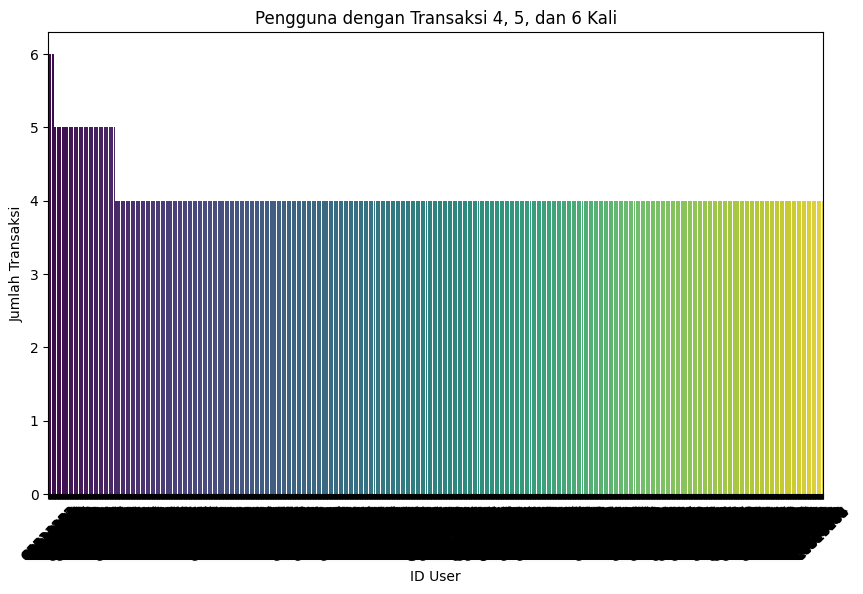

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk pengguna dengan jumlah transaksi 4, 5, dan 6
specific_users = user_transaction_data[user_transaction_data['TransactionCount'].isin([4, 5, 6])]

# Visualisasi data transaksi pengguna spesifik
plt.figure(figsize=(10, 6))
sns.barplot(x=specific_users['IDUser'], y=specific_users['TransactionCount'], palette='viridis')
plt.xlabel('ID User')
plt.ylabel('Jumlah Transaksi')
plt.title('Pengguna dengan Transaksi 4, 5, dan 6 Kali')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Untuk memilih user yang melakukan 4-6 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts >= 4) & (user_transaction_counts <= 6)].index
filtered_data = data[data['IDUser'].isin(selected_users)]
filtered_data

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
6,C7126560,183419,2016-08-02,T7,106646,2,8,2016
193,C4325361,25098219,2016-08-07,T194,18842000,7,8,2016
256,C5212180,31661068,2016-10-21,T257,1884,21,10,2016
555,C4036863,3524724,2016-10-21,T556,229307,21,10,2016
748,C1533067,482229,2016-10-21,T749,149794,21,10,2016
...,...,...,...,...,...,...,...,...
1048006,C3040576,46292250,2016-09-18,T1048007,144239,18,9,2016
1048065,C1629287,2736505,2016-09-18,T1048066,47482,18,9,2016
1048100,C2439181,734152,2016-09-18,T1048101,56526,18,9,2016
1048117,C1533452,34833886,2016-09-18,T1048118,86673,18,9,2016


In [21]:
# Untuk memilih user yang melakukan 4 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts >= 4) & (user_transaction_counts < 5)].index
filtered_data = data[data['IDUser'].isin(selected_users)]
filtered_data

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
6,C7126560,183419,2016-08-02,T7,106646,2,8,2016
256,C5212180,31661068,2016-10-21,T257,1884,21,10,2016
555,C4036863,3524724,2016-10-21,T556,229307,21,10,2016
748,C1533067,482229,2016-10-21,T749,149794,21,10,2016
940,C1810279,6576851,2016-10-21,T941,113052,21,10,2016
...,...,...,...,...,...,...,...,...
1048006,C3040576,46292250,2016-09-18,T1048007,144239,18,9,2016
1048065,C1629287,2736505,2016-09-18,T1048066,47482,18,9,2016
1048100,C2439181,734152,2016-09-18,T1048101,56526,18,9,2016
1048117,C1533452,34833886,2016-09-18,T1048118,86673,18,9,2016


In [22]:
# Untuk memilih user yang melakukan 5 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts > 4) & (user_transaction_counts < 6)].index
filtered_data = data[data['IDUser'].isin(selected_users)]
filtered_data

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
193,C4325361,25098219,2016-08-07,T194,18842000,7,8,2016
2846,C7431859,9257900,2016-10-21,T2847,99486,21,10,2016
4513,C2833541,1155,2016-09-23,T4514,169578,23,9,2016
5590,C2618678,1407205,2016-09-22,T5591,268046,22,9,2016
6549,C3638492,7418533,2016-09-25,T6550,7537,25,9,2016
...,...,...,...,...,...,...,...,...
1040909,C4631592,119,2016-09-18,T1040910,35611,18,9,2016
1041063,C6735715,16915942,2016-09-18,T1041064,277731,18,9,2016
1045312,C8137979,2989417,2016-09-18,T1045313,103631,18,9,2016
1046146,C4423377,3342916,2016-09-18,T1046147,119187,18,9,2016


In [23]:
# Untuk memilih user yang melakukan 6 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts >= 6)].index
filtered_data = data[data['IDUser'].isin(selected_users)]
filtered_data

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
13195,C4327447,1896489,2016-09-26,T13196,5653,26,9,2016
19882,C3226689,2142222,2016-09-26,T19883,37684,26,9,2016
28272,C5533885,1749188,2016-09-25,T28273,20349,25,9,2016
35317,C6624352,28796666,2016-09-27,T35318,395256,27,9,2016
35613,C3226689,18242911,2016-09-30,T35614,78760,30,9,2016
...,...,...,...,...,...,...,...,...
922508,C6222360,993143,2016-09-12,T922509,18842,12,9,2016
944746,C5531319,720115,2016-09-11,T944747,85354,11,9,2016
949173,C4513786,1888083,2016-09-10,T949174,9421,10,9,2016
977856,C6222360,91003,2016-09-15,T977857,18842,15,9,2016


In [25]:
# Contoh Transaksi Sebanyak 4 kali dengan IDUser = C7126560
data[data['IDUser'] == 'C7126560']

,IDUser,SaldoUser,TransactionDate,TransactionID,TransactionAmount(IDR),TransactionDay,TransactionMonth,TransactionYear
6,C7126560,183419,2016-08-02,T7,106646,2,8,2016
835789,C7126560,386704,2016-09-04,T835790,6783,4,9,2016
894830,C7126560,2365766,2016-09-07,T894831,3580,7,9,2016
967750,C7126560,6562638,2016-09-10,T967751,37684,10,9,2016
